<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорт-файла-с-данными-и-подготовка-данных" data-toc-modified-id="Импорт-файла-с-данными-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импорт файла с данными и подготовка данных</a></span></li><li><span><a href="#Посмотрим-на-участников-марафона" data-toc-modified-id="Посмотрим-на-участников-марафона-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Посмотрим на участников марафона</a></span></li><li><span><a href="#Оценим-результаты-спортсменов" data-toc-modified-id="Оценим-результаты-спортсменов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Оценим результаты спортсменов</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Анализ результатов Московского марафона 2018 года

Рассматриваемый датафрейм представляет собой результаты Московского марафона, который состоялся 23 сентября 2018 года.
Имеется информация о двух основных забегах: 10 км и 42,195 км (марафон). 
В исследовании проанализированы данные о спортсменах и их результатах.

### Импорт файла с данными и подготовка данных

In [1]:
# Импортируем библиотеки:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<span style="color:blue">Библиотеки импортированы.</span>

In [2]:
# Сохраним датафрейм в переменную:

data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-kirilovichev/data_marathon.csv')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21662 entries, 0 to 21661
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   finish_time_sec       21385 non-null  float64
 1   finish_time_result    21385 non-null  object 
 2   race                  21662 non-null  object 
 3   pace_sec              21385 non-null  float64
 4   pace(minpkm)          21385 non-null  object 
 5   pace(kmph)            21385 non-null  object 
 6   half_pace_sec         21380 non-null  float64
 7   half_pace(minpkm)     21380 non-null  object 
 8   half_pace(kmph)       21385 non-null  object 
 9   gender_en             21662 non-null  object 
 10  age                   21662 non-null  int64  
 11  location_city_ru      21662 non-null  object 
 12  location_city_en      21662 non-null  object 
 13  country_code_alpha_3  21662 non-null  object 
 14  flag_DNF              21662 non-null  int64  
 15  flag_all_split_exis

<span style="color:blue">В датафрейме информация о 21662 участниках марафона.</span>

In [3]:
# Исключим ненужные для анализа столбцы:

data = data.drop(columns=['pace_sec', 'half_pace_sec', 'half_pace(minpkm)', 
                          'half_pace(kmph)', 'location_city_en', 'race_uniform_index', 'flag_all_split_exist']                )
data.head()

,finish_time_sec,finish_time_result,race,pace(minpkm),pace(kmph),gender_en,age,location_city_ru,country_code_alpha_3,flag_DNF
0,8911.0,2h 28min 31sec,42.195 km,3:31 min/km,17.0 km/h,Female,30,Якутск,RUS,0
1,9308.0,2h 35min 08sec,42.195 km,3:40 min/km,16.3 km/h,Female,35,Чебоксары,RUS,0
2,8122.0,2h 15min 22sec,42.195 km,3:12 min/km,18.7 km/h,Male,31,Казань,RUS,0
3,8467.0,2h 21min 07sec,42.195 km,3:20 min/km,17.9 km/h,Male,36,Москва,RUS,0
4,8738.0,2h 25min 38sec,42.195 km,3:27 min/km,17.4 km/h,Male,42,Уфа,RUS,0


<span style="color:blue">Столбцы исключены.</span>

In [4]:
# Переименуем столбцы на понятные названия:

data = data.rename(columns={'finish_time_result':'finish_time_hours', 'race': 'distance', 'pace(minpkm)': 'speed_minpkm',
                           'pace(kmph)':'speed_kmph', 'gender_en':'gender', 'location_city_ru':'city', 
                            'country_code_alpha_3':'country', 'flag_DNF':'do_not_finish'})
data.head(10)

,finish_time_sec,finish_time_hours,distance,speed_minpkm,speed_kmph,gender,age,city,country,do_not_finish
0,8911.0,2h 28min 31sec,42.195 km,3:31 min/km,17.0 km/h,Female,30,Якутск,RUS,0
1,9308.0,2h 35min 08sec,42.195 km,3:40 min/km,16.3 km/h,Female,35,Чебоксары,RUS,0
2,8122.0,2h 15min 22sec,42.195 km,3:12 min/km,18.7 km/h,Male,31,Казань,RUS,0
3,8467.0,2h 21min 07sec,42.195 km,3:20 min/km,17.9 km/h,Male,36,Москва,RUS,0
4,8738.0,2h 25min 38sec,42.195 km,3:27 min/km,17.4 km/h,Male,42,Уфа,RUS,0
5,8513.0,2h 21min 53sec,42.195 km,3:21 min/km,17.8 km/h,Male,33,Ханты-Мансийск,RUS,0
6,8670.0,2h 24min 30sec,42.195 km,3:25 min/km,17.5 km/h,Male,30,Москва,RUS,0
7,8982.0,2h 29min 42sec,42.195 km,3:32 min/km,16.9 km/h,Male,26,Белгород,RUS,0
8,8394.0,2h 19min 54sec,42.195 km,3:18 min/km,18.1 km/h,Male,27,Барнаул,RUS,0
9,8856.0,2h 27min 36sec,42.195 km,3:29 min/km,17.2 km/h,Male,28,Санкт-Петербург,RUS,0


<span style="color:blue">Столбцы переименованы.</span>

In [5]:
# Проверим пропуски:

data.isnull().sum()

finish_time_sec      277
finish_time_hours    277
distance               0
speed_minpkm         277
speed_kmph           277
gender                 0
age                    0
city                   0
country                0
do_not_finish          0
dtype: int64

<span style="color:blue">В строках встречаются 277 пропусков в столбцах, связанных со временем и скоростью участников. Возможно, это участники, которые не финишировали. Поэтому их удалять не будем и вернемся к ним позднее.</span>

In [6]:
# Проверим дубликаты:

data.duplicated().sum()

703

<span style="color:blue">В датафрейме обнаружены 703 дубликатов. Ввиду удаления из датафрейма стартовых номеров установить, что эти дубликаты касаются одних и тех же спортсменов, не представляется возможным. Поэтому ввиду их малого количества удалять их не будем.</span>

In [7]:
# Еще раз посмотрим на типы данных в столбцах:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21662 entries, 0 to 21661
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   finish_time_sec    21385 non-null  float64
 1   finish_time_hours  21385 non-null  object 
 2   distance           21662 non-null  object 
 3   speed_minpkm       21385 non-null  object 
 4   speed_kmph         21385 non-null  object 
 5   gender             21662 non-null  object 
 6   age                21662 non-null  int64  
 7   city               21662 non-null  object 
 8   country            21662 non-null  object 
 9   do_not_finish      21662 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 1.7+ MB


In [8]:
# Поменяем тип данных в столбце со скоростью 'speed_kmph', чтобы в дальнейшем искать средние скорости:

data['speed_kmph'] = data['speed_kmph'].str.replace(' km/h','')
data['speed_kmph'] = data['speed_kmph'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21662 entries, 0 to 21661
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   finish_time_sec    21385 non-null  float64
 1   finish_time_hours  21385 non-null  object 
 2   distance           21662 non-null  object 
 3   speed_minpkm       21385 non-null  object 
 4   speed_kmph         21385 non-null  float64
 5   gender             21662 non-null  object 
 6   age                21662 non-null  int64  
 7   city               21662 non-null  object 
 8   country            21662 non-null  object 
 9   do_not_finish      21662 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 1.7+ MB


<span style="color:blue">Тип данных столбца 'speed_kmph' изменен на float.</span>

### Посмотрим на участников марафона

In [9]:
# Оценим участников марафона, для чего создадим переменные:

# сгруппируем время финиша по дистанции
groupby_distance = (data
    .groupby('distance', as_index = False)[['finish_time_sec']]
    .count().sort_values(by = 'finish_time_sec', ascending = False)
    .reset_index(drop = True)
    .rename(columns={'finish_time_sec':'distance_cnt'})
                   )

# сгруппируем время финиша по полу участников
groupby_gender = (data
    .groupby('gender', as_index = False)[['finish_time_sec']]
    .count().sort_values(by = 'finish_time_sec', ascending = False)
    .reset_index(drop = True)
    .rename(columns={'finish_time_sec':'gender_cnt'})
               )

# сгруппируем время финиша по возрасту участников и возьмем топ-10 возрастов
groupby_age = (data
    .groupby('age', as_index = False)[['finish_time_sec']]
    .count().sort_values(by = 'finish_time_sec', ascending = False)
    .reset_index(drop = True)
    .rename(columns={'finish_time_sec':'age_cnt'})
    [:10]             
              )

<span style="color:blue">Переменные созданы.</span>

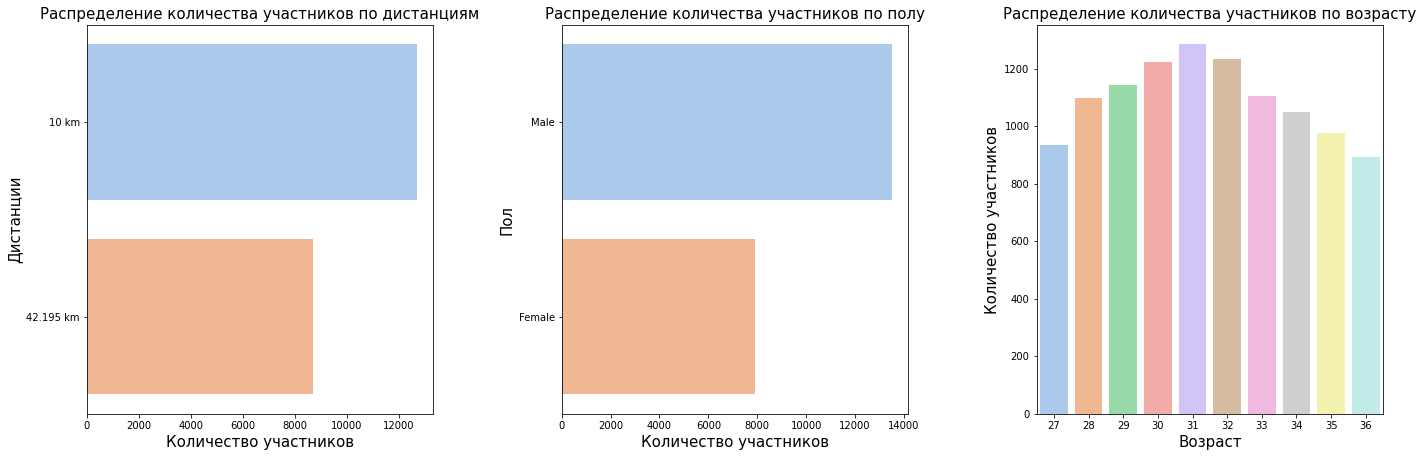

In [10]:
# Построим графики:

plt.figure(figsize=(20, 12))
    
ax1 = plt.subplot(2, 3, 1)
sns.barplot(x='distance_cnt', y='distance', data=groupby_distance, palette = sns.color_palette('pastel'))
plt.title('Распределение количества участников по дистанциям', fontsize=15)
plt.xlabel('Количество участников', fontsize=15)
plt.ylabel('Дистанции', fontsize=15)

ax2 = plt.subplot(2, 3, 2)
sns.barplot(x='gender_cnt', y='gender', data=groupby_gender, palette = sns.color_palette('pastel'))
plt.title('Распределение количества участников по полу', fontsize=15)
plt.xlabel('Количество участников', fontsize=15)
plt.ylabel('Пол', fontsize=15)

ax3 = plt.subplot(2, 3, 3)
sns.barplot(x='age', y='age_cnt', data=groupby_age, palette = sns.color_palette('pastel'))
plt.title('Распределение количества участников по возрасту', fontsize=15)
plt.xlabel('Возраст', fontsize=15)
plt.ylabel('Количество участников', fontsize=15)

plt.tight_layout()
plt.show()

<span style="color:blue">Количество участников на дистанции 10 км примерно на половину превышает количество бегунов на марафонской дистанции. Мужчин примерно вдвое больше, чем женщин. Топ-10 возрастов по количеству участников составляют диапазон от 27 до 36 лет.</span>

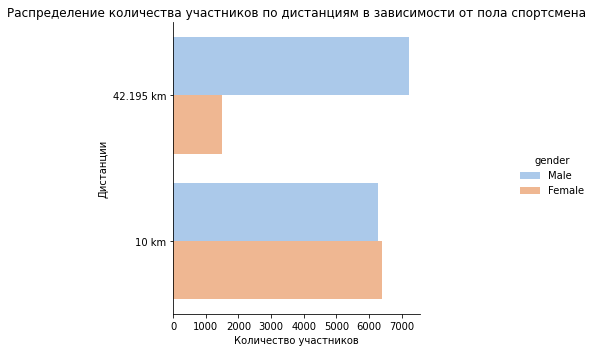

In [11]:
# Посмотрим, какие дистанции чаше выбирают мужчины и женщины:

groupby_dist_gender_cnt = (data
        .groupby(['distance', 'gender'], as_index = False)[['finish_time_sec']]
        .count()
        .reset_index(drop = True)
        .sort_values(by = 'finish_time_sec', ascending = False)
        .rename(columns={'finish_time_sec':'finish_time_cnt'})
        )

sns.catplot(
    data=groupby_dist_gender_cnt, kind='bar',
    x='finish_time_cnt', y='distance', hue='gender',
    palette='pastel', alpha=1, height=5, aspect = 1.2
)  
plt.title('Распределение количества участников по дистанциям в зависимости от пола спортсмена')
plt.xlabel('Количество участников')
plt.ylabel('Дистанции')
plt.tight_layout()
plt.show()

<span style="color:blue">Мужчин на дистанциях 10 и 42 км примерно поровну. А на дистанции 42 км женщин в разы меньше, чем мужчин.</span>

In [12]:
# Оценим количество участников по городам:

# сгруппируем по городам
groupby_city = (data
    .groupby('city', as_index = False)[['finish_time_sec']]
    .count().sort_values(by = 'finish_time_sec', ascending = False)
    .reset_index(drop = True)
    .rename(columns={'finish_time_sec':'city_cnt'})
    [:10]
               )
display(groupby_city)

# посчитаем общее количество уникальных городов
print('Общее количество городов участников составляет:', data['city'].nunique())

,city,city_cnt
0,Москва,14588
1,Санкт-Петербург,670
2,Bangkok,206
3,Нижний Новгород,204
4,Химки,125
5,Балашиха,121
6,Зеленоград,121
7,Казань,117
8,Одинцово,106
9,Новосибирск,102


Общее количество городов участников составляет: 829


<span style="color:blue">В марафоне участвовали представители 829 городов. Среди них лидеры Москва, Санкт-Петербург и столица Тайланда Бангкок. Москва идет со значительным отрывом.</span>

In [13]:
# Оценим количество участников по странам:

groupby_country = (data
    .groupby('country', as_index = False)[['finish_time_sec']]
    .count().sort_values(by = 'finish_time_sec', ascending = False)
    .reset_index(drop = True)
    .rename(columns={'finish_time_sec':'country_cnt'})
    [:10]
               )
display(groupby_country)

# посчитаем общее количество уникальных стран
print('Общее количество стран участников составляет:', data['country'].nunique())

,country,country_cnt
0,RUS,20503
1,THA,206
2,BLR,67
3,CHN,64
4,HKG,50
5,UKR,36
6,DEU,35
7,ESP,34
8,ITA,33
9,GBR,30


Общее количество стран участников составляет: 61


<span style="color:blue">В марафоне участвовали граждане 61 страны. Среди них лидеры Россия, Тайланд и Беларусь. Россия идет со значительным отрывом.</span>

In [14]:
# Оценим количество участников по дошедшим/недошедшим до финиша:

print(data['do_not_finish'].value_counts())

0    21385
1      277
Name: do_not_finish, dtype: int64


<span style="color:blue">Среди участников 277 человек не финишировали.</span>

<span style="color:blue">
Общий вывод о спортсменах участниках:

- Количество участников на дистанции 10 км примерно на половину превышает количество бегунов на марафонской дистанции. Мужчин примерно вдвое больше, чем женщин. Топ-10 возрастов по количеству участников составляют диапазон от 27 до 36 лет. Мужчин на дистанциях 10 и 42 км примерно поровну. А на дистанции 42 км женщин в разы меньше, чем мужчин;
- В марафоне участвовали представители 829 городов. Среди них лидеры Москва, Санкт-Петербург и столица Тайланда Бангкок. Москва идет со значительным отрывом;
- В марафоне участвовали граждане 61 страны. Среди них лидеры Россия, Тайланд и Беларусь. Россия идет со значительным отрывом;
- Среди участников 277 человек не финишировали.
</span>

### Оценим результаты спортсменов

In [15]:
data.head(10)

,finish_time_sec,finish_time_hours,distance,speed_minpkm,speed_kmph,gender,age,city,country,do_not_finish
0,8911.0,2h 28min 31sec,42.195 km,3:31 min/km,17.0,Female,30,Якутск,RUS,0
1,9308.0,2h 35min 08sec,42.195 km,3:40 min/km,16.3,Female,35,Чебоксары,RUS,0
2,8122.0,2h 15min 22sec,42.195 km,3:12 min/km,18.7,Male,31,Казань,RUS,0
3,8467.0,2h 21min 07sec,42.195 km,3:20 min/km,17.9,Male,36,Москва,RUS,0
4,8738.0,2h 25min 38sec,42.195 km,3:27 min/km,17.4,Male,42,Уфа,RUS,0
5,8513.0,2h 21min 53sec,42.195 km,3:21 min/km,17.8,Male,33,Ханты-Мансийск,RUS,0
6,8670.0,2h 24min 30sec,42.195 km,3:25 min/km,17.5,Male,30,Москва,RUS,0
7,8982.0,2h 29min 42sec,42.195 km,3:32 min/km,16.9,Male,26,Белгород,RUS,0
8,8394.0,2h 19min 54sec,42.195 km,3:18 min/km,18.1,Male,27,Барнаул,RUS,0
9,8856.0,2h 27min 36sec,42.195 km,3:29 min/km,17.2,Male,28,Санкт-Петербург,RUS,0


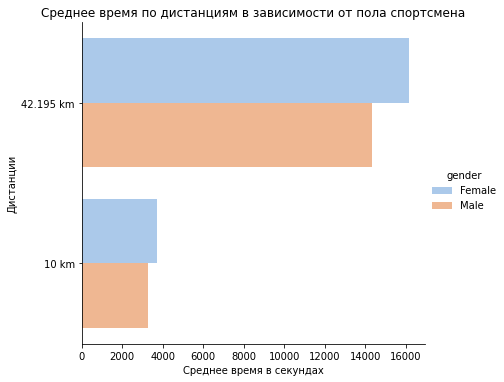

In [16]:
# Посчитаем среднее время спортсменов каждого пола в зависимости от дистанции:

data_dist_gender_time = (data
        .groupby(['distance', 'gender'], as_index = False)[['finish_time_sec']]
        .median()
        .reset_index(drop = True)
        .sort_values(by = 'finish_time_sec', ascending = False)
        .rename(columns={'finish_time_sec':'finish_time_median'})
        )

sns.catplot(
    data=data_dist_gender_time, kind='bar',
    x='finish_time_median', y='distance', hue='gender',
    palette='pastel', alpha=1, height=5, aspect = 1.2
)  

plt.title('Среднее время по дистанциям в зависимости от пола спортсмена')
plt.xlabel('Среднее время в секундах')
plt.ylabel('Дистанции')

# отображаем график на экране
plt.show()

<span style="color:blue">На дистанции 42 км среднее время у женщин примерно на 2000 секунд (33 минуты) больше, чем у мужчин. На дистанции 10 км различия в среднем времени незначительны.</span>

In [17]:
# Посчитаем лучшее время спортсменов каждого пола в зависимости от дистанции:

# лучшее время у мужчин на дистанции 42 км
print('Лучшее время в секундах у мужчин на дистанции 42 км:', 
      data[(data['distance'] == '42.195 km') & (data['gender'] == 'Male')]['finish_time_sec'].min())

# лучшее время у у женщин на дистанции 42 км
print('Лучшее время в секундах у женщин на дистанции 42 км:',
      data[(data['distance'] == '42.195 km') & (data['gender'] == 'Female')]['finish_time_sec'].min())

# лучшее время у мужчин на дистанции 10 км
print('Лучшее время в секундах у мужчин на дистанции 10 км:',
      data[(data['distance'] == '10 km') & (data['gender'] == 'Male')]['finish_time_sec'].min())

# лучшее время у мужчин на дистанции 42 км
print('Лучшее время в секундах у женщин на дистанции 10 км:',
      data[(data['distance'] == '10 km') & (data['gender'] == 'Female')]['finish_time_sec'].min())

Лучшее время в секундах у мужчин на дистанции 42 км: 8122.0
Лучшее время в секундах у женщин на дистанции 42 км: 8911.0
Лучшее время в секундах у мужчин на дистанции 10 км: 1728.0
Лучшее время в секундах у женщин на дистанции 10 км: 2003.0


<span style="color:blue">На дистанции 42 км лучшее время у мужчин составляет 8122 секунды (2 часа 15 минут), у женщин - 8911 секунд (2 часа 29 минут). На дистанции 10 км  лучшее время у мужчин составляет 1728 секунд (29 минут), у женщин - 2003 секунды (33 минуты). Разница - в 14 и 4 минуты соответственно.</span>

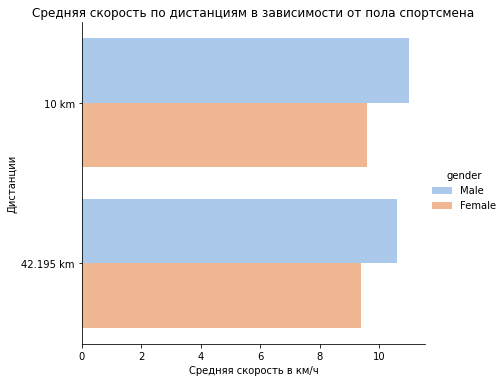

In [18]:
# Посчитаем среднюю скорость спортсменов каждого пола в зависимости от дистанции:

data_dist_gender_cnt = (data
        .groupby(['distance', 'gender'], as_index = False)[['speed_kmph']]
        .median()
        .reset_index(drop = True)
        .sort_values(by = 'speed_kmph', ascending = False)
        .rename(columns={'speed_kmph':'speed_median'})
        )

sns.catplot(
    data=data_dist_gender_cnt, kind='bar',
    x='speed_median', y='distance', hue='gender',
    palette='pastel', alpha=1, height=5, aspect = 1.2
)  

plt.title('Средняя скорость по дистанциям в зависимости от пола спортсмена')
plt.xlabel('Средняя скорость в км/ч')
plt.ylabel('Дистанции')

# отображаем график на экране
plt.show()

<span style="color:blue">На обеих дистанциях средняя скорость у женщин примерно на 1 км/ч ниже, чем у мужчин. Средняя скорость спортсменов на обеих дистанциях составляет примерно 10 км/ч.</span>

In [19]:
# Посчитаем лучшую скорость спортсменов каждого пола в зависимости от дистанции:

# лучшее время у мужчин на дистанции 42 км
print('Лучший показатель скорости у мужчин на дистанции 42 км:', 
      data[(data['distance'] == '42.195 km') & (data['gender'] == 'Male')]['speed_kmph'].max())

# лучшее время у у женщин на дистанции 42 км
print('Лучший показатель скорости у женщин на дистанции 42 км:',
      data[(data['distance'] == '42.195 km') & (data['gender'] == 'Female')]['speed_kmph'].max())

# лучшее время у мужчин на дистанции 10 км
print('Лучший показатель скорости у мужчин на дистанции 10 км:',
      data[(data['distance'] == '10 km') & (data['gender'] == 'Male')]['speed_kmph'].max())

# лучшее время у мужчин на дистанции 42 км
print('Лучший показатель скорости у женщин на дистанции 10 км:',
      data[(data['distance'] == '10 km') & (data['gender'] == 'Female')]['speed_kmph'].max())

Лучший показатель скорости у мужчин на дистанции 42 км: 18.7
Лучший показатель скорости у женщин на дистанции 42 км: 17.0
Лучший показатель скорости у мужчин на дистанции 10 км: 20.8
Лучший показатель скорости у женщин на дистанции 10 км: 18.0


<span style="color:blue">На дистанции 42 км лучшая скорость у мужчин на 1.7 км/ч выше, чем у женщин. На дистанции 10 км лучшая скорость у мужчин на 2.8 км/ч больше, чем у женщин. Лучшие скорости спортсменов обоих полов на обеих дистанциях держатся в районе 18-19 км/ч, что примерно на 8-9 км/ч быстрее средних скоростей. Лидеры бегут вдвое быстрее, чем средний бегун.</span>

In [20]:
# Найдем самые быстрые возраста в диапазоне от 27 до 36 лет среди мужчин на обеих дистанциях:

data_10_male_time = (data[(data['distance'] == '10 km') & (data['gender'] == 'Male') & (data['age'] > 26) & (data['age'] < 37)]
        .groupby(['age'], as_index = False)[['finish_time_sec']]
        .median()
        .sort_values(by = 'finish_time_sec', ascending = True)
        .rename(columns={'finish_time_sec':'finish_time_median'})
        .reset_index(drop = True)
        [:10]
        )
display(data_10_male_time)

data_42_male_time = (data[(data['distance'] == '42.195 km') & (data['gender'] == 'Male') & (data['age'] > 26) & (data['age'] < 37)]
        .groupby(['age'], as_index = False)[['finish_time_sec']]
        .median()
        .sort_values(by = 'finish_time_sec', ascending = True)
        .rename(columns={'finish_time_sec':'finish_time_median'})
        .reset_index(drop = True)
        [:10]
        )
display(data_42_male_time)

,age,finish_time_median
0,32,3163.5
1,29,3200.5
2,34,3209.0
3,30,3225.5
4,28,3237.0
5,33,3242.0
6,31,3246.0
7,36,3296.0
8,35,3302.0
9,27,3314.0


,age,finish_time_median
0,35,14097.0
1,31,14118.0
2,34,14203.5
3,33,14204.0
4,36,14204.0
5,32,14235.0
6,27,14248.0
7,29,14341.0
8,30,14370.0
9,28,14438.5


<span style="color:blue">Из топ-10 возрастов по количеству бегунов самый "бегущий" возраст у мужчин на дистанции 10 км - 32 года, на дистанции 42 км - 35 лет. Остальные возраста не брались в расчет, т.к. в них значительно меньше участников, и их результаты могут исказить данные.</span>

In [21]:
# То же самое найдем для женщин:

data_10_female_time = (data[(data['distance'] == '10 km') & (data['gender'] == 'Female') & (data['age'] > 26) & (data['age'] < 37)]
        .groupby(['age'], as_index = False)[['finish_time_sec']]
        .median()
        .sort_values(by = 'finish_time_sec', ascending = True)
        .rename(columns={'finish_time_sec':'finish_time_median'})
        .reset_index(drop = True)
        [:10]
        )
display(data_10_female_time)

data_42_female_time = (data[(data['distance'] == '42.195 km') & (data['gender'] == 'Female') & (data['age'] > 26) & (data['age'] < 37)]
        .groupby(['age'], as_index = False)[['finish_time_sec']]
        .median()
        .sort_values(by = 'finish_time_sec', ascending = True)
        .rename(columns={'finish_time_sec':'finish_time_median'})
        .reset_index(drop = True)
        [:10]
        )
display(data_42_female_time)

,age,finish_time_median
0,28,3645.0
1,33,3690.0
2,29,3693.0
3,36,3696.5
4,30,3705.0
5,31,3717.0
6,32,3719.0
7,35,3719.0
8,27,3774.0
9,34,3774.0


,age,finish_time_median
0,33,15352.5
1,36,15404.5
2,31,15979.0
3,27,16003.0
4,30,16044.5
5,32,16064.0
6,34,16107.0
7,28,16187.0
8,29,16244.0
9,35,16846.0


<span style="color:blue">У женщин самые "бегущие" возраста на дистанции 10 км - это 28 лет, на дистанции 42 км - это 33 года. "Беговой" возраст женщин наступает раньше.</span>

### Общий вывод

<span style="color:blue">
Общий вывод о спортсменах участниках:

- Количество участников на дистанции 10 км примерно на половину превышает количество бегунов на марафонской дистанции. Мужчин примерно вдвое больше, чем женщин. Топ-10 возрастов по количеству участников составляют диапазон от 27 до 36 лет;
- В марафоне участвовали представители 829 городов. Среди них лидеры Москва, Санкт-Петербург и столица Тайланда Бангкок. Москва идет со значительным отрывом;
- В марафоне участвовали граждане 61 страны. Среди них лидеры Россия, Тайланд и Беларусь. Россия идет со значительным отрывом.
- Среди участников 277 человек не финишировали.
    
Общий вывод о результатах участников забегов:
    
- На дистанции 42 км среднее время у женщин примерно на 2000 секунд (33 минуты) больше, чем у мужчин. На дистанции 10 км различия в среднем времени незначительны;
- На дистанции 42 км лучшее время у мужчин составляет 8122 секунды (2 часа 15 минут), у женщин - 8911 секунд (2 часа 29 минут). На дистанции 10 км  лучшее время у мужчин составляет 1728 секунд (29 минут), у женщин - 2003 секунды (33 минуты). Разница - в 14 и 4 минуты соответственно;
- На обеих дистанциях средняя скорость у женщин примерно на 1 км/ч ниже, чем у мужчин. Средняя скорость спортсменов на обеих дистанциях составляет примерно 10 км/ч;
- На дистанции 42 км лучшая скорость у мужчин на 1.7 км/ч выше, чем у женщин. На дистанции 10 км лучшая скорость у мужчин на 2.8 км/ч больше, чем у женщин. Лучшие скорости спортсменов обоих полов на обеих дистанциях держатся в районе 18-19 км/ч, что примерно на 8-9 км/ч быстрее средних скоростей. Лидеры бегут вдвое быстрее, чем средний бегун;
- Из топ-10 возрастов по количеству бегунов самый "бегущий" возраст у мужчин на дистанции 10 км - 32 года, на дистанции 42 км - 35 лет. Остальные возраста не брались в расчет, т.к. в них значительно меньше участников, и их результаты могут исказить данные;
- У женщин самые "бегущие" возраста на дистанции 10 км - это 28 лет, на дистанции 42 км - это 33 года. "Беговой" возраст женщин наступает раньше;
- Сравнения показателей по городам и странам не проводились, т.к. из других городов и стран (не из России и не из Москвы) участвовало значительно меньше людей. Такие спортсмены, будучи готовыми приехать на соревнования в другой город или другую страну, вцелом должны быть заведомо лучше готовы, чем средний спортсмен, участвующий в соревнованиях в своем городе. Поэтому результаты таких спортсменов могут исказить общие данные.
</span>